In [39]:
import sys
sys.path.insert(0, '../../wildlife-tools')
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import pandas as pd
import torchvision.transforms as T
import timm

from wildlife_datasets import datasets
from wildlife_tools.data import WildlifeDataset
from wildlife_tools.features import DeepFeatures
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.inference import KnnClassifier

import os
sys.path.append('..')
import pandas as pd
from wildlife_datasets import datasets
from wildlife_datasets.analysis import display_statistics
from wildlife_datasets.splits import visualize_split
from wildlife_datasets.splits import TimeCutoffSplit, TimeProportionSplit


In [19]:
qwe = 0
for d_name in datasets.names_all:
    try:
        # print(d_name.__name__, int(d_name.metadata['reported_n_individuals']))
        # d_name.metadata
        qwe += d_name.metadata['reported_n_individuals']
        # print(qwe)
    except:
        # print("yes")

        pass
qwe

8536.0

In [20]:
datasets.MacaqueFaces.metadata

{'licenses': 'Other',
 'licenses_url': 'https://github.com/clwitham/MacaqueFaces/blob/master/license.md',
 'url': 'https://github.com/clwitham/MacaqueFaces',
 'cite': 'witham2018automated',
 'animals': {'rhesus macaque'},
 'animals_simple': 'macaques',
 'real_animals': True,
 'year': 2018,
 'reported_n_total': 6460.0,
 'reported_n_identified': 6460.0,
 'reported_n_photos': 6460.0,
 'reported_n_individuals': 34.0,
 'wild': False,
 'clear_photos': True,
 'pose': 'single',
 'unique_pattern': False,
 'from_video': True,
 'cropped': True,
 'span': '1.4 years',
 'size': 12.0}

In [23]:
root = 'data/MacaqueFaces'
datasets.MacaqueFaces.get_data(root)

DATASET MacaqueFaces: DOWNLOADING STARTED.


MacaqueFaces.zip: 12.0MB [00:02, 5.94MB/s]                            
MacaqueFaces_ImageInfo.csv: 410kB [00:00, 501kB/s]                             


DATASET MacaqueFaces: EXTRACTING STARTED.
DATASET MacaqueFaces: FINISHED.



In [24]:
d = datasets.MacaqueFaces(root)
dataset = WildlifeDataset(d.df, d.root)

In [27]:
dataset_attributes = dir(dataset)
print(dataset_attributes)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'col_label', 'col_path', 'from_config', 'get_image', 'img_load', 'labels', 'labels_map', 'labels_string', 'load_label', 'metadata', 'num_classes', 'root', 'split', 'transform']


In [33]:
num_classes = dataset.num_classes
num_classes

34

In [36]:
df = d.df

In [38]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df

,image_id,identity,path,date,category,year
0,0,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_1.jpg,2014-07-03,Contrast,2014
1,1,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_2.jpg,2014-07-03,Contrast,2014
2,2,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_3.jpg,2014-08-06,Contrast,2014
3,3,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_4.jpg,2014-08-06,Contrast,2014
4,4,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_5.jpg,2014-06-12,Contrast,2014
...,...,...,...,...,...,...
6275,6275,Verity,MacaqueFaces\Random\Verity\Macaque_Face_6276.jpg,2014-02-19,Random,2014
6276,6276,Verity,MacaqueFaces\Random\Verity\Macaque_Face_6277.jpg,2014-02-19,Random,2014
6277,6277,Verity,MacaqueFaces\Random\Verity\Macaque_Face_6278.jpg,2014-03-21,Random,2014
6278,6278,Verity,MacaqueFaces\Random\Verity\Macaque_Face_6279.jpg,2014-02-19,Random,2014


Number of identitites            34
Number of all animals            6280
Number of animals with one image 0
Number of unidentified animals   0
Images span                      1.4 years


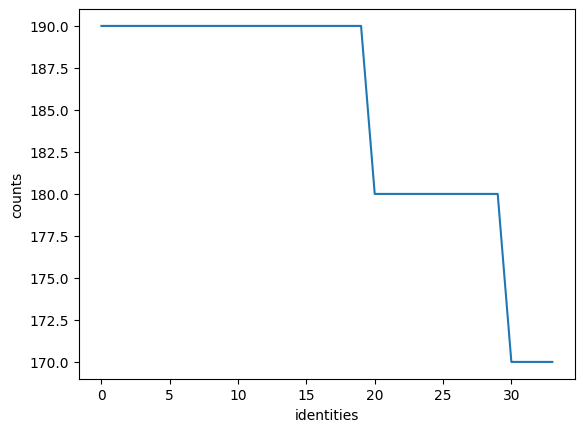

In [40]:
display_statistics(df)

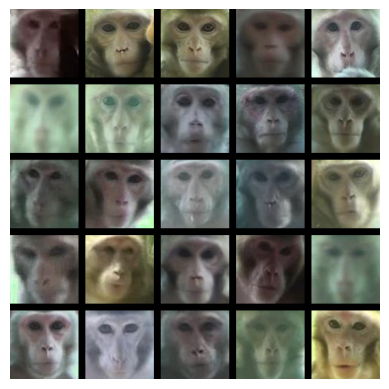

In [41]:
d.plot_grid(n_cols=5);

In [43]:
print(df.columns)

Index(['image_id', 'identity', 'path', 'date', 'category', 'year'], dtype='object')


In [49]:
unique_categories = df['identity'].unique()
print(unique_categories)

['Dan' 'Judd' 'Lala' 'Leah' 'Libby' 'Linz' 'Love' 'Lydia' 'Maj' 'Meesha'
 'Meg' 'Melody' 'Mindy' 'Ocelot' 'Rupee' 'Saphy' 'Serena' 'Shirley'
 'Sizzle' 'Sol' 'Sonja' 'Spice' 'Star' 'Sugar' 'Tamara' 'Tass' 'Tea'
 'Teal' 'Tes' 'Thyme' 'Umbrella' 'Ursula' 'Venus' 'Verity']


In [45]:
unique_categories = df['category'].unique()
print(unique_categories)

['Contrast' 'Expression' 'Good' 'Obscured' 'Rotated' 'Random']


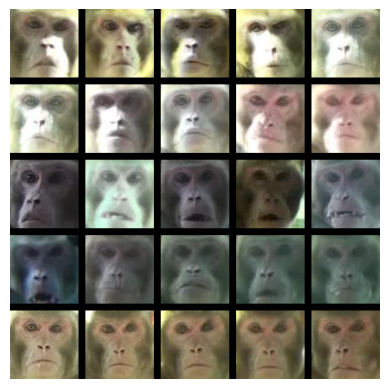

In [50]:
d.plot_grid(n_cols=5, idx=df['identity']=='Dan');

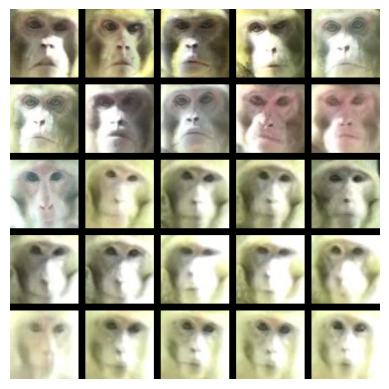

In [44]:
d.plot_grid(n_cols=5, idx=df['category']=='Contrast');

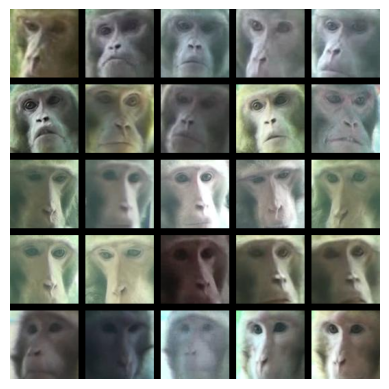

In [46]:
d.plot_grid(n_cols=5, idx=df['category']=='Rotated');

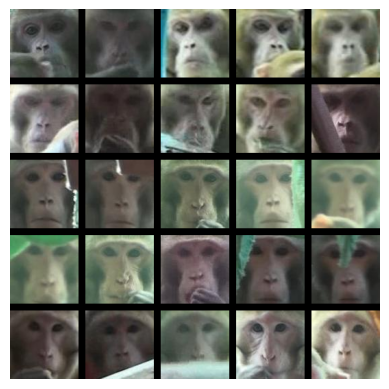

In [47]:
d.plot_grid(n_cols=5, idx=df['category']=='Obscured');

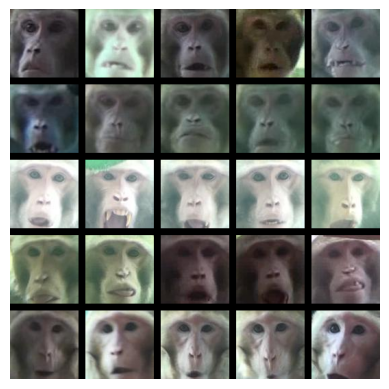

In [48]:
d.plot_grid(n_cols=5, idx=df['category']=='Expression');

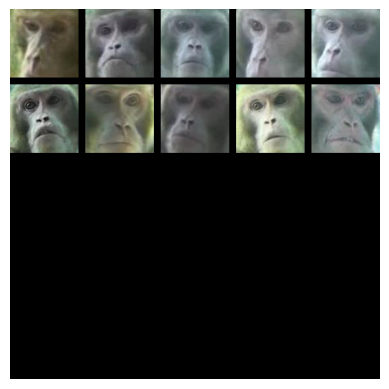

In [51]:
d.plot_grid(n_cols=5, idx=(df['category']=='Rotated')*(df['identity']=='Dan'));

Year 2014


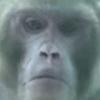

Year 2015


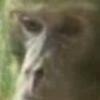

In [52]:
df_Dan = df[df['identity'] == 'Dan']
for year, df_Dan_year in df_Dan[df_Dan['category'] == 'Rotated'].sort_values('year').groupby('year'):
    print(f"Year {year}")
    display(datasets.get_image(os.path.join(root, df_Dan_year.iloc[0]['path']), max_size=300))

Year 2014


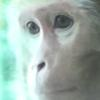

Year 2015


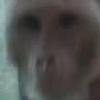

In [54]:
df_Dan = df[df['identity'] == 'Libby']
for year, df_Dan_year in df_Dan[df_Dan['category'] == 'Rotated'].sort_values('year').groupby('year'):
    print(f"Year {year}")
    display(datasets.get_image(os.path.join(root, df_Dan_year.iloc[0]['path']), max_size=300))

In [57]:
print(d)

In [58]:
transform = T.Compose([T.Resize([224, 224]), T.ToTensor(), T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])
dataset_database = WildlifeDataset(df.iloc[100:,:], root, transform=transform)
dataset_query = WildlifeDataset(df.iloc[:100,:], root, transform=transform)

In [59]:
from wildlife_tools.features import DeepFeatures

name = 'hf-hub:BVRA/MegaDescriptor-T-224'
extractor = DeepFeatures(timm.create_model(name, num_classes=0, pretrained=True))

100%|███████████████████████████████████████████████████████████████| 49/49 [13:38<00:00, 16.70s/it]


In [69]:
# Assuming df contains your entire dataset
dataset = WildlifeDataset(df, root, transform=transform)

# Extracting the query instances and database instances
dataset_query = WildlifeDataset(df.iloc[:100, :], root, transform=transform)
dataset_database = WildlifeDataset(df.iloc[100:, :], root, transform=transform)

query_features, database_features = extractor(dataset_query), extractor(dataset_database)

100%|███████████████████████████████████████████████████████████████| 49/49 [13:42<00:00, 16.79s/it]


In [70]:
print(f'Query features shape: {query_features.shape}, Database features shape: {database_features.shape}')

Query features shape: (100, 768), Database features shape: (6180, 768)


In [71]:
import numpy as np

In [72]:
from wildlife_tools.similarity import CosineSimilarity

# Cosine similarity between deep features
similarity = CosineSimilarity()
sim = similarity(query_features, database_features)['cosine']
print("Similarity matrix: \n", sim.shape)

Similarity matrix: 
 (100, 6180)


In [73]:
# classifier = KnnClassifier(k=1, database_labels=dataset_database.labels_string)
# predictions = classifier(similarity['cosine'])

# Nearest neigbour classifier using the similarity
classifier = KnnClassifier(k=1, database_labels=dataset_database.labels_string)
preds = classifier(sim)
print(type(preds))
print("Prediction \t", preds)
print("Ground truth \t", dataset_query.labels_string)



<class 'numpy.ndarray'>
Prediction 	 ['Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan'
 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan'
 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan'
 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan'
 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan'
 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan'
 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan'
 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan'
 'Dan' 'Dan' 'Dan' 'Dan']
Ground truth 	 ['Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan'
 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan'
 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan'
 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan'
 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Dan' 'Da

D:\Classroom\Project\p1\wildlife-tools\wildlife_tools\inference\classifier.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


In [75]:
# # 1. Inspect Shapes
# print("Shape of dataset_database.labels_string:", dataset_database.labels_string.shape)
# print("Shape of predictions:", predictions.shape)

In [76]:
# # 2. Verify KNN Classifier
# # Check if the number of predictions matches the number of instances in the query set
# print("Number of predictions:", len(predictions))

In [77]:
# # 3. Check Similarity Calculation
# # Check the shapes of similarity['cosine'] to ensure they match the query and database sizes
# print("Shape of similarity['cosine']:", similarity['cosine'].shape)

In [74]:
# accuracy = np.mean(dataset_database.labels_string == predictions)

acc = sum(preds == dataset_query.labels_string) / len(dataset_query.labels_string)
print('\n Accuracy: ', acc)


 Accuracy:  1.0


In [79]:
# Importing metrics
from wildlife_datasets.metrics import accuracy, balanced_accuracy, precision, recall, f1

# Assuming y_true and y_pred are your true labels and predictions respectively
y_true = dataset_query.labels_string  # True labels
y_pred = preds  # Predicted labels

# Computing evaluation metrics
acc = accuracy(y_true, y_pred)
bal_acc = balanced_accuracy(y_true, y_pred)
prec = precision(y_true, y_pred)
rec = recall(y_true, y_pred)
f1_score = f1(y_true, y_pred)

# Printing the computed metrics
print("Accuracy:", acc)
print("Balanced Accuracy:", bal_acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1_score)

Accuracy: 1.0
Balanced Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


c:\Users\HP\scoop\apps\python\current\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
